In [2]:
import pandas as pd

## Task 1 
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [3]:
names = 'Name1 Surname1, Name2 Surname2'
names_list = names.split(',') # answer

## Task 2
В переменной df содержатся данные такого вида: 

clint | sex | wealth | age  
9002  |  1  | medium | 63  
6722  |  1  | high   | 54  
8799  |  1  | high   | 62  
8737  |  0  | low    | 54  
5206  |  0  | medium | 37  


Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35

In [16]:
df = pd.DataFrame({'client': [9002, 6722, 8799, 8737, 5206], 
                   'sex': [1, 1, 1, 0, 0], 
                   'wealth': ['medium', 'high', 'high', 'low', 'medium'],
                   'age' : [63, 54, 62, 54, 37]})
medium_35 = df.query("wealth == 'medium' and age > 35") #answer

## Task 3
Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df

In [3]:
df = pd.DataFrame({'Клиент id' : [1, 1], 'Пол': [1, 1], 'Благосостояние': [1, 1], 'Возраст': [1, 1]})
df.rename(columns = {'Клиент id' : 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'}, inplace=True) #answer

## Task 4
Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)

In [5]:
df = pd.DataFrame({'client': [9002, 6722, 8799, 8737, 5206], 
                   'sex': [1, 1, 1, 0, 0], 
                   'wealth': ['medium', 'high', 'high', 'low', 'medium'],
                   'age' : [63, 54, 62, 54, 37]})

df['older_than_30'] = df.age > 30 #answer

## Task 5
А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [7]:
df = pd.DataFrame({'client': [9002, 6722, 8799, 8737, 5206], 
                   'sex': [1, 1, 1, 0, 0], 
                   'wealth': ['medium', 'high', 'high', 'low', 'medium'],
                   'age' : [63, 54, 62, 54, 37]})
unique_num = df.apply('nunique') #answer

## Task 6 
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)

In [250]:
df = pd.DataFrame({'client': [9002, 6722, 8799, 8737, 5206], 
                   'sex': [1, 1, 1, 0, 0], 
                   'wealth': ['medium', 'high', 'high', 'low', 'medium'],
                   'age' : [63, 54, 62, 54, 37]})

data = pd.DataFrame({'client': [5392, 9581, 7250, 8619, 6573], 
                     'amount': [1, 1, 1, 0, 0], 
                     'date': ['medium', 'high', 'high', 'low', 'medium']})

full_data = df.merge(data, how = 'inner', on = 'client') #answer


## Task 7 
Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:

 1. принимает на вход один параметр – путь к файлу
 2. при помощи переданного пути, считывает файл, в котором разделителем является ;
 3. считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
 4. возвращает результат этих действий (агрегированный датафрэйм)


In [29]:
def read_n_agg(path_to_file):
    
    companies = pd.read_csv(filepath_or_buffer=path_to_file, sep=';')
    avg_company = (
        companies
        .groupby('company', as_index=True)
        .agg({'income': 'mean'})
    )
    
    return avg_company
# answer is the function

In [30]:
path = '3_companies.csv'
read_n_agg(path)

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


## Task 8 
Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя. 

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). 
Результат запишите в переменную taxi.

In [31]:
path_to_file = '3_taxi_peru.csv'

In [37]:
import pandas as pd 
taxi = pd.read_csv(filepath_or_buffer=path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
# answer

## Task 9
Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого

In [123]:
(
    taxi
     .groupby('source')
     .agg({'journey_id' : 'count'})
     .transform(lambda x: x/x.sum())
     .mul(100).round()
     .reset_index()
     .sort_values(by = 'journey_id', ascending=False)
)
# answer - 42


,source,journey_id
3,iPhone,42.0
4,web,33.0
0,Android,21.0
2,iPad,2.0
1,Wap,1.0


## Task 10

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).

Какой график получился?

<AxesSubplot: xlabel='source', ylabel='journey_id'>

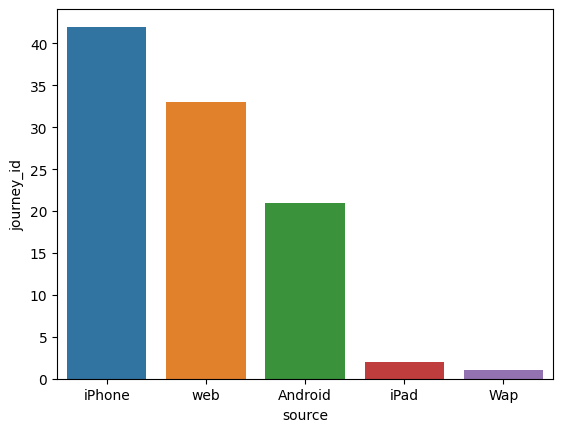

In [100]:
import seaborn as sns
count_by_platform = (
    taxi
     .groupby('source')
     .agg({'journey_id' : 'count'})
     .transform(lambda x: round(x/x.sum()*100))
     .reset_index()
     .sort_values(by = 'journey_id', ascending=False)
)
sns.barplot(count_by_platform, x="source", y="journey_id")
# answer - C

## Task 11 
Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.

Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего

<AxesSubplot: xlabel='icon', ylabel='count'>

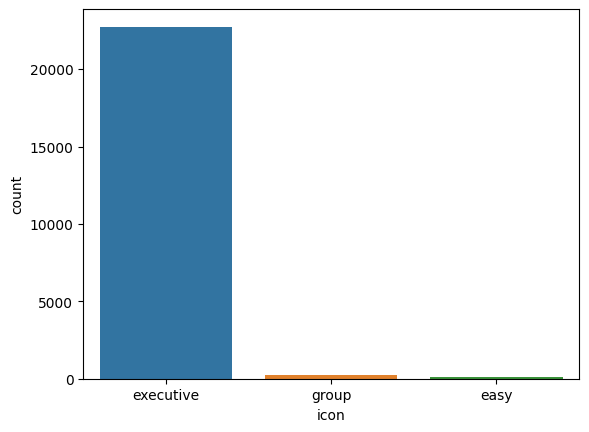

In [108]:
sns.countplot(data = taxi, x = 'icon')
# answer - executive

## Task 12
С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

<AxesSubplot: xlabel='source', ylabel='count'>

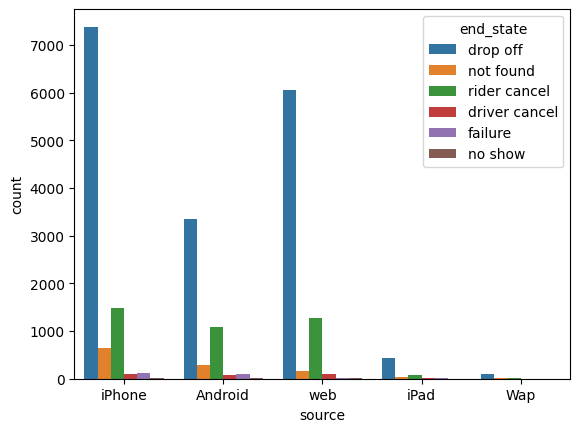

In [112]:
sns.countplot(data = taxi, x = 'source', hue = 'end_state')
# answer 
# 1 - Больше всего заказов со статусом drop off совершено с платформы iPhone
# 2 - На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone
# 3 - Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone

## Task 13
Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

 1. Посчитайте частоту встречаемости каждой из оценок
 2. Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
 3. Сбросьте индексы
 4. Переименуйте колонки в driver_score и percentage
 5. Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
 6. Запишите результат в driver_score_counts

In [245]:
driver_score_counts = (
    taxi
     .groupby('driver_score', as_index=False)
     .agg(journeys = ('journey_id', 'count'))
     .assign(total_journeys = lambda x: x.journeys/x.journeys.sum(),
             percentage = lambda x: x.total_journeys.mul(100).round(2))
     .filter(items=['driver_score', 'percentage'])
     .sort_values(by = 'driver_score')
)

## Task 14

Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

```
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
```

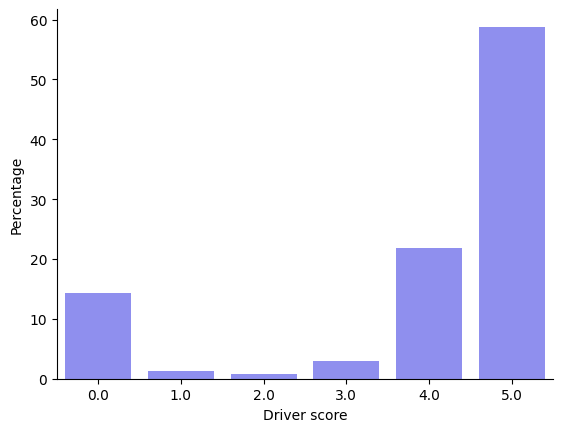

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика

# убрать первую строку
# answer - 1

## Task 15

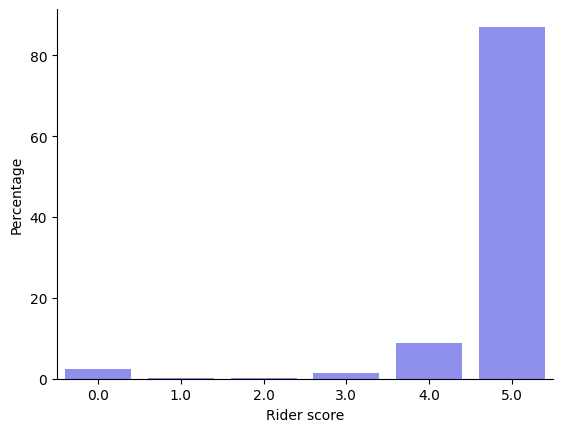

In [249]:
rider_score_counts = (
    taxi
     .groupby('rider_score', as_index=False)
     .agg(journeys = ('journey_id', 'count'))
     .assign(total_journeys = lambda x: x.journeys/x.journeys.sum(),
             percentage = lambda x: x.total_journeys.mul(100).round(2))
     .filter(items=['rider_score', 'percentage'])
     .sort_values(by = 'rider_score')
)

ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика

# answer 
# 1. Водители ставят больше 0, чем клиенты
# 2. 